In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [4]:
df=pd.read_csv("/Users/ryanmaroof/ml and dl projects/CustomerSegmentation/ecommerce_customer_churn_10k.csv")

In [5]:
df.sample(5)

,customer_id,signup_date,last_purchase_date,days_since_last_purchase,account_age_days,country,age,gender,device_type,favorite_category,total_orders,total_spent_usd,avg_order_value,is_premium_member,churned
8026,CUST008156,2025-08-16,2025-12-31,1,137,United States,28,Female,Mobile,Fashion,11,133.64,12.15,0,0
7781,CUST004180,2025-07-30,2025-12-20,12,143,India,41,Female,Mobile,Home & Garden,3,269.77,89.92,0,0
3002,CUST005290,2024-08-13,2025-01-04,362,144,United Kingdom,33,Female,Mobile,Electronics,10,44.54,4.45,0,1
3691,CUST003868,2024-10-05,2025-09-12,111,342,Japan,23,Female,Mobile,Electronics,5,758.74,151.75,0,1
1197,CUST009262,2024-04-02,2025-10-28,65,574,Brazil,53,Male,Mobile,Electronics,4,56.14,14.04,1,0


In [6]:
df.shape

(10000, 15)

In [7]:
df.dtypes

customer_id                  object
signup_date                  object
last_purchase_date           object
days_since_last_purchase      int64
account_age_days              int64
country                      object
age                           int64
gender                       object
device_type                  object
favorite_category            object
total_orders                  int64
total_spent_usd             float64
avg_order_value             float64
is_premium_member             int64
churned                       int64
dtype: object

In [8]:
df.isnull().sum()

customer_id                 0
signup_date                 0
last_purchase_date          0
days_since_last_purchase    0
account_age_days            0
country                     0
age                         0
gender                      0
device_type                 0
favorite_category           0
total_orders                0
total_spent_usd             0
avg_order_value             0
is_premium_member           0
churned                     0
dtype: int64

In [9]:
df['churned'].value_counts()

churned
0    6229
1    3771
Name: count, dtype: int64

In [10]:
df.describe()

,days_since_last_purchase,account_age_days,age,total_orders,total_spent_usd,avg_order_value,is_premium_member,churned
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,118.835500,240.763900,33.885600,7.713700,312.222272,208.596229,0.143900,0.377100
std,169.226426,171.295808,9.465531,29.907347,530.249651,443.111121,0.351006,0.484685
min,1.000000,0.000000,18.000000,1.000000,10.000000,0.030000,0.000000,0.000000
25%,1.000000,97.000000,27.000000,1.000000,65.765000,26.087500,0.000000,0.000000
50%,1.000000,210.000000,34.000000,1.000000,151.000000,78.335000,0.000000,0.000000
75%,208.000000,362.000000,40.000000,3.000000,343.177500,211.305000,0.000000,1.000000
max,719.000000,725.000000,78.000000,300.000000,9564.940000,9564.940000,1.000000,1.000000


array([[<Axes: title={'center': 'days_since_last_purchase'}>,
        <Axes: title={'center': 'account_age_days'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'total_orders'}>,
        <Axes: title={'center': 'total_spent_usd'}>,
        <Axes: title={'center': 'avg_order_value'}>],
       [<Axes: title={'center': 'is_premium_member'}>,
        <Axes: title={'center': 'churned'}>, <Axes: >]], dtype=object)

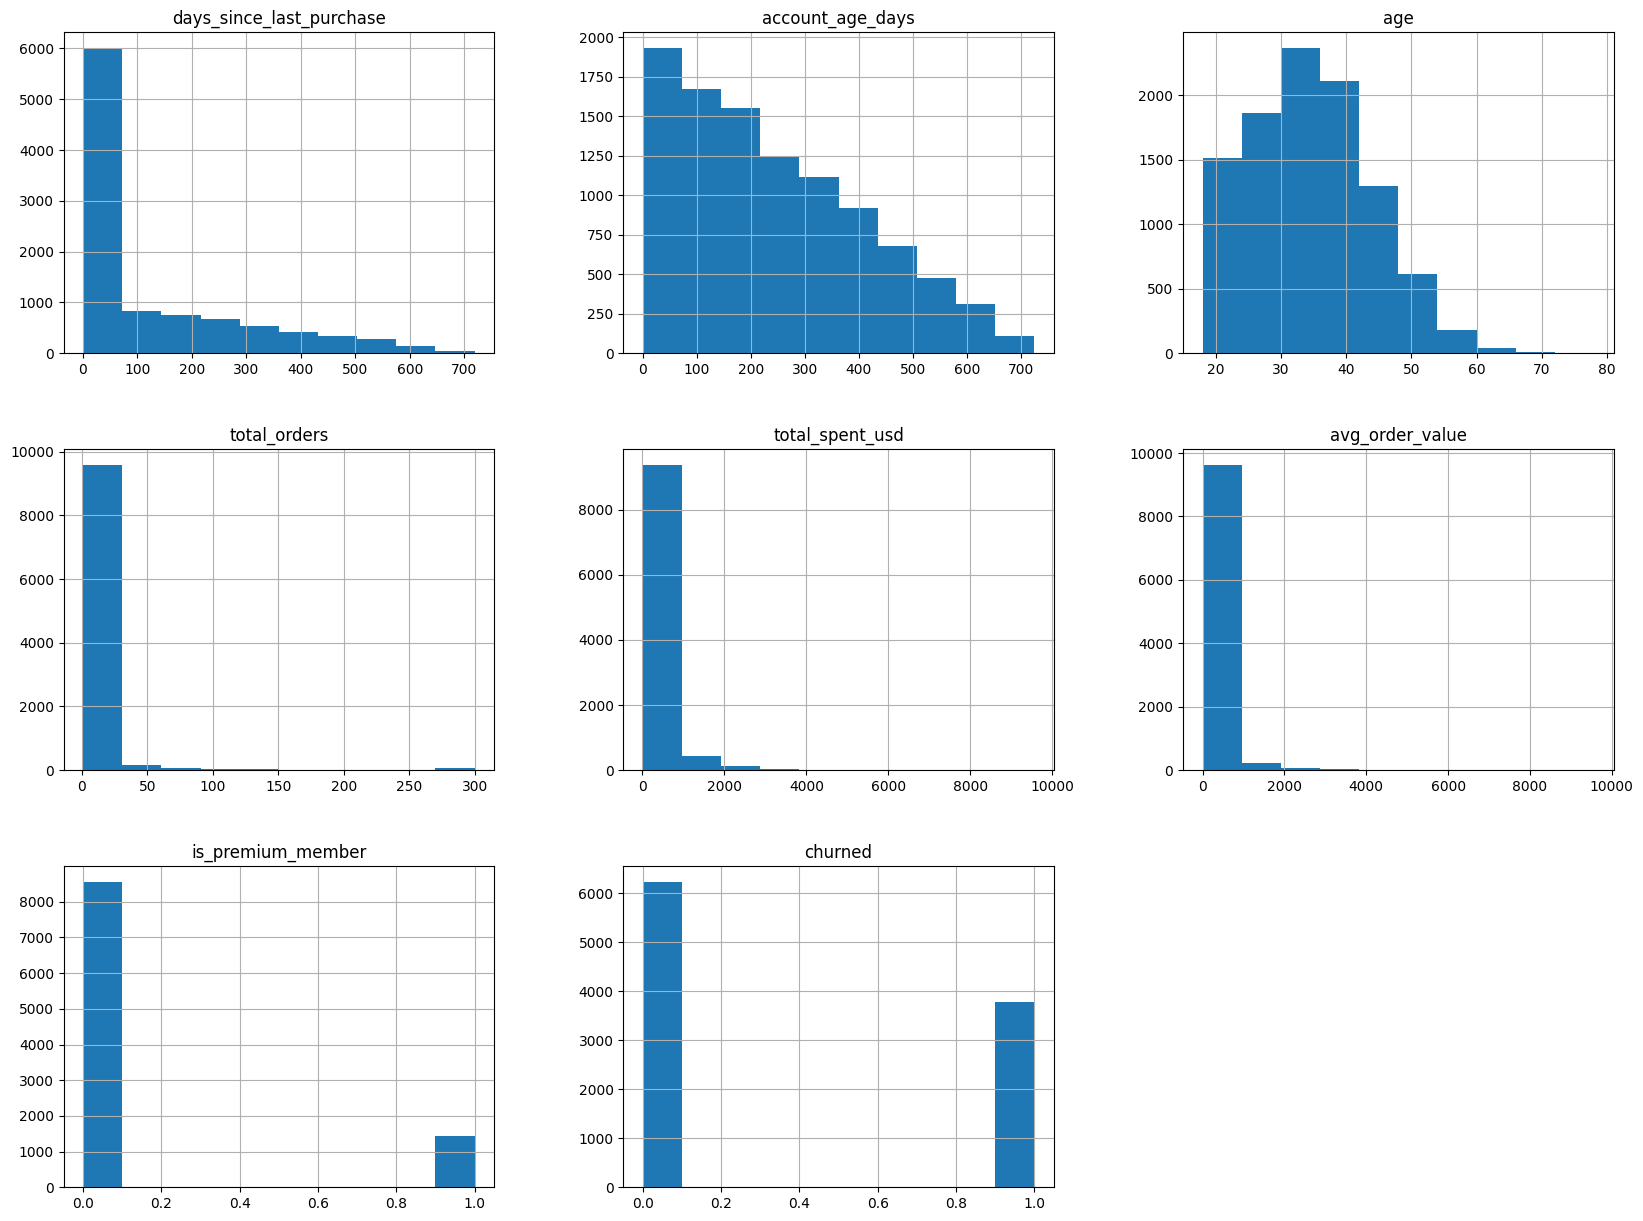

In [11]:
df.hist(figsize=(20,15))

In [12]:
df=df.drop("customer_id",axis=1)

In [13]:
df=df.drop(['signup_date','last_purchase_date'],axis=1)

In [14]:
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [15]:
scaler=StandardScaler()
le=LabelEncoder()

for col in ['country', 'gender', 'device_type', 'favorite_category']:
    df[col] = le.fit_transform(df[col])

X=scaler.fit_transform(df)

In [16]:
X.shape

(10000, 12)

In [17]:
X[0]

array([ 3.42850419, -1.21879421,  1.2222813 ,  0.54034537, -0.98204639,
        0.4688321 ,  0.37528496, -0.12417971, -0.04930428, -0.30936503,
       -0.40998517,  1.28523013])

In [18]:
from sklearn.cluster import KMeans

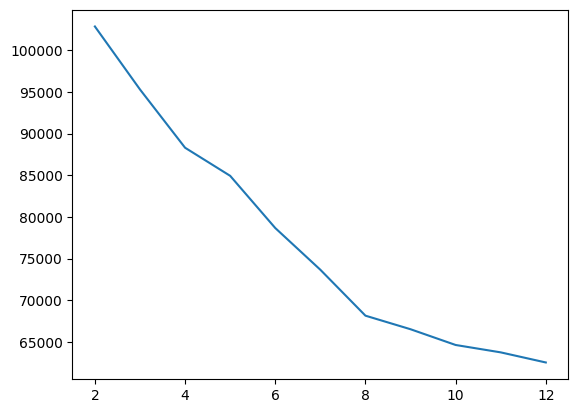

In [19]:
inertis=[]
k_range=range(2,13)
for k in k_range:
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(X)
    inertis.append(kmeans.inertia_)

plt.plot(k_range,inertis)
plt.show()



In [20]:
k=7
kmeans=KMeans(n_clusters=k)
df['clusters']=kmeans.fit_predict(X)
print(df.groupby('clusters').mean())

          days_since_last_purchase  account_age_days   country        age  \
clusters                                                                    
0                       437.389807        109.075069  5.178375  34.138430   
1                       199.020046        294.040664  5.691294  33.308706   
2                         6.836194        145.832761  7.525257  35.671898   
3                        12.922777        481.273848  5.957820  33.649578   
4                        98.768138        256.572177  5.366492  34.147345   
5                       120.218341        250.419214  5.366812  34.816594   
6                         7.451691        179.038647  2.398551  31.952295   

            gender  device_type  favorite_category  total_orders  \
clusters                                                           
0         0.535813     0.714876           3.496556      7.793388   
1         0.569301     0.766323           2.933562      6.307560   
2         0.531633     0.696910   

In [21]:
cluster_summary = df.groupby('clusters')[[
    'days_since_last_purchase',  # Recency
    'total_orders',              # Frequency
    'total_spent_usd',           # Monetary
    'avg_order_value',           # Average order size
    'is_premium_member',         # Premium status (0 or 1)
    'churned'                    # Churn rate
]].mean()
print(cluster_summary.round(2))

          days_since_last_purchase  total_orders  total_spent_usd  \
clusters                                                            
0                           437.39          7.79           248.38   
1                           199.02          6.31           256.74   
2                             6.84          5.80           244.93   
3                            12.92          6.63           258.78   
4                            98.77          8.62           255.60   
5                           120.22          3.11          2806.44   
6                             7.45         12.40           260.08   

          avg_order_value  is_premium_member  churned  
clusters                                               
0                  153.82               0.05     1.00  
1                  162.49               0.00     1.00  
2                  161.47               0.00     0.00  
3                  161.47               0.00     0.00  
4                  160.84               1.

In [22]:
segment_names = {
    0: 'Premium At-Risk',     # 100% premium, 38% churned
    1: 'Lost - Churned',      # Long gone (368 days), 100% churned
    2: 'Loyal Active',        # Recent (14 days), 1% churned (was High-Value Rare)
    3: 'Lapsed Churned',      # Inactive (256 days), 100% churned (was Champions)
    4: 'Champions',           # Very recent (7 days), 0% churned (was Loyal Recent)
    5: 'High-Value Rare',     # Big spender ($2782) but infrequent
    6: 'Power Buyers'         # High order count (245)
}
df['segment'] = df['clusters'].map(segment_names)

In [23]:
df.head()

,days_since_last_purchase,account_age_days,country,age,gender,device_type,favorite_category,total_orders,total_spent_usd,avg_order_value,is_premium_member,churned,clusters,segment
0,699,32,9,39,0,1,4,4,286.08,71.52,0,1,0,Premium At-Risk
1,552,179,3,26,2,1,0,79,268.42,3.40,0,1,0,Premium At-Risk
2,612,119,6,46,0,1,3,1,60.28,60.28,0,1,0,Premium At-Risk
3,282,449,4,34,0,2,4,1,139.94,139.94,1,1,4,Champions
4,552,179,9,36,0,1,5,1,10.00,10.00,1,1,0,Premium At-Risk


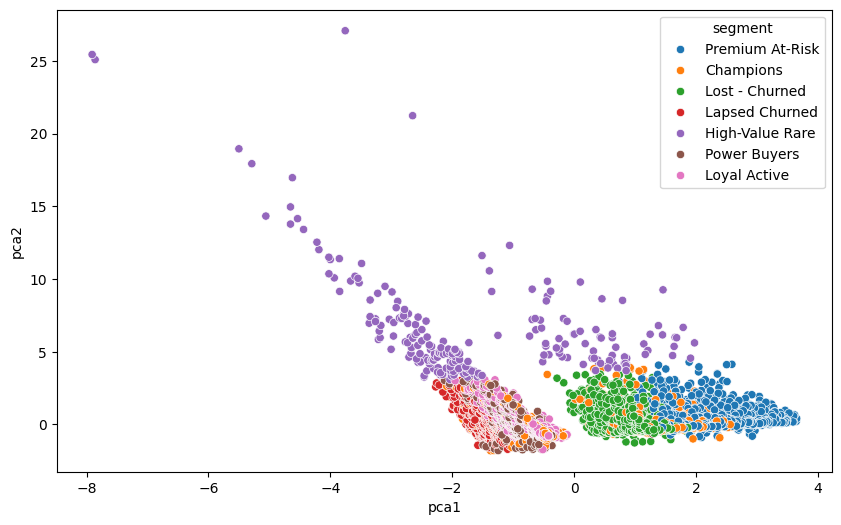

In [24]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2) 
x_pca=pca.fit_transform(X)

df['pca1']=x_pca[:,0]
df['pca2']=x_pca[:,1]

plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='pca1',y='pca2',hue='segment')
plt.show()


In [25]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

In [26]:
feature_cols=[cols for cols in df.columns if cols not in ['segment','clusters','pca1','pca2']]

X_train, X_test, y_train, y_test = train_test_split(df[feature_cols], df['clusters'], test_size=0.2, random_state=42)

In [27]:
df.dtypes

days_since_last_purchase      int64
account_age_days              int64
country                       int64
age                           int64
gender                        int64
device_type                   int64
favorite_category             int64
total_orders                  int64
total_spent_usd             float64
avg_order_value             float64
is_premium_member             int64
churned                       int64
clusters                      int32
segment                      object
pca1                        float64
pca2                        float64
dtype: object

In [28]:
model = XGBClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss'
)
model.fit(X_train, y_train)

/Users/ryanmaroof/ml and dl projects/ml_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [18:00:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [29]:
from sklearn.metrics import classification_report, accuracy_score
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.975

In [30]:
df.dtypes

days_since_last_purchase      int64
account_age_days              int64
country                       int64
age                           int64
gender                        int64
device_type                   int64
favorite_category             int64
total_orders                  int64
total_spent_usd             float64
avg_order_value             float64
is_premium_member             int64
churned                       int64
clusters                      int32
segment                      object
pca1                        float64
pca2                        float64
dtype: object

In [31]:

importance = pd.DataFrame({
    'feature': feature_cols,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)
print(importance)

                     feature  importance
11                   churned    0.406465
10         is_premium_member    0.300584
0   days_since_last_purchase    0.097326
1           account_age_days    0.059935
2                    country    0.056600
8            total_spent_usd    0.022117
9            avg_order_value    0.021097
3                        age    0.010351
5                device_type    0.008946
7               total_orders    0.007892
6          favorite_category    0.006407
4                     gender    0.002280


In [32]:
churn_features=[cols for cols in feature_cols if cols != 'churned']
X_train2, X_test2, y_train2, y_test2 = train_test_split(df[churn_features], df['churned'], test_size=0.2, random_state=42)

In [33]:
churn_model= XGBClassifier(
    n_estimators=200,
    max_depth=3,
    learning_rate=0.05,
    min_child_weight=10,
    reg_alpha=1.0,
    reg_lambda=5.0,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='logloss'
)

In [34]:
churn_model.fit(X_train2, y_train2)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=10, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [35]:
y_pred2=churn_model.predict(X_test2)
accuracy_score(y_test2,y_pred2)

0.9975

In [36]:
importance2 = pd.DataFrame({
    'feature': churn_features,
    'importance': churn_model.feature_importances_
}).sort_values('importance', ascending=False)
print(importance2)

                     feature  importance
0   days_since_last_purchase    0.983857
1           account_age_days    0.011760
6          favorite_category    0.001010
8            total_spent_usd    0.000955
3                        age    0.000667
9            avg_order_value    0.000554
7               total_orders    0.000430
2                    country    0.000362
10         is_premium_member    0.000213
4                     gender    0.000103
5                device_type    0.000089


In [37]:
import joblib
joblib.dump(model,'segment_model.pkl')
joblib.dump(churn_model,'churn_model.pkl')
joblib.dump(scaler,'scaler.pkl')

['scaler.pkl']

In [38]:
import tensorflow